# Obligatorisk innlevering 1 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi kjøp av bilforsikring ved kjøp av bil

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, RepeatedKFold,train_test_split,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

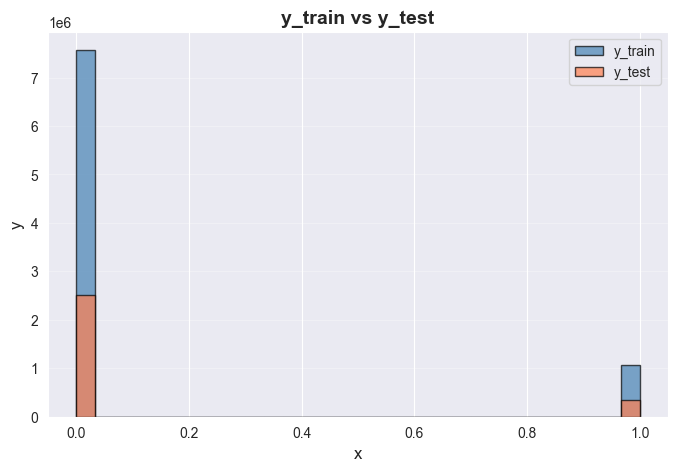

In [5]:
#TODO: visualiser y_train og y_test i et histogram
#Lager Historgramet
plt.figure(figsize=(8, 5))

#Histogram for y_train
plt.hist(y_train, bins=30, color='steelblue', alpha=0.7, label='y_train', edgecolor='black')

#Histogram for y_test
plt.hist(y_test, bins=30, color='coral', alpha=0.7, label='y_test', edgecolor='black')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.title('y_train vs y_test', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.3)

plt.legend()
plt.show()

**Svar:**

*< Dette er et klassifiseringsproblem fordi vi har bare 2 verdier i x aksen som kan bare være 0 eller 1>*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


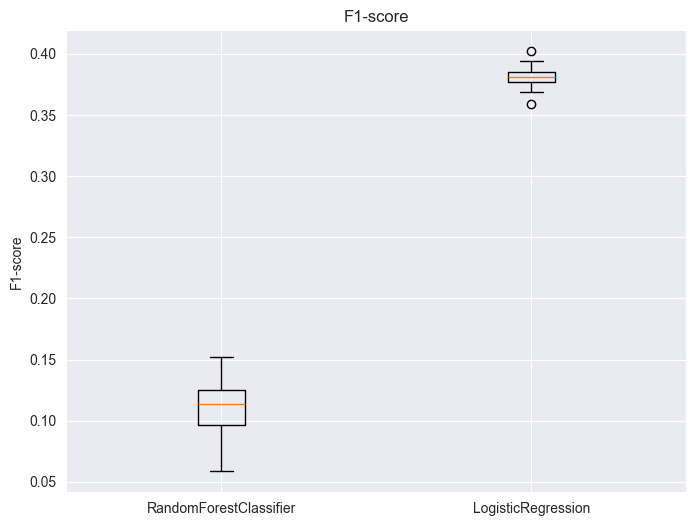


To-sidig t-test mellom model1 og model2:
t-statistikk = -83.577, p-verdi = 0.000

Gjennomsnitt og F1-score accuracy:
RandomForestClassifier: F1 = 0.111, Accuracy = 0.878
LogisticRegression: F1 = 0.381, Accuracy = 0.638


In [6]:
#limiterer til 10 000 rader fordi å kjøre hele datasettet er urealistik
X_small = X.iloc[:10000]
y_small = y.iloc[:10000]

#Tar in kolloner fra datasett2.csv
categorical_cols = ['Vehicle_Age', 'Vehicle_Damage', 'Gender']
numeric_cols = ['Age', 'Driving_License', 'Region_Code',
                'Previously_Insured', 'Annual_Premium',
                'Policy_Sales_Channel', 'Vintage']

#Gjørm om Objekter til numeriske verdier for å kjøre modeller
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X_small)

#F1 scorer
f1_scorer = make_scorer(f1_score, pos_label=1)

#Modeller
model1 = RandomForestClassifier(random_state=42, class_weight='balanced')
model2 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

#Repetert Kfold
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

#F1 score
f1_model1 = cross_val_score(model1, X_processed, y_small, cv=rkf, scoring=f1_scorer)
f1_model2 = cross_val_score(model2, X_processed, y_small, cv=rkf, scoring=f1_scorer)

#Accuracy Score
acc_model1 = cross_val_score(model1, X_processed, y_small, cv=rkf, scoring='accuracy')
acc_model2 = cross_val_score(model2, X_processed, y_small, cv=rkf, scoring='accuracy')

#Boxplot
plt.figure(figsize=(8,6))
plt.boxplot([f1_model1, f1_model2], tick_labels=['RandomForestClassifier', 'LogisticRegression'])
plt.ylabel('F1-score')
plt.title('F1-score')
plt.show()

#To-sidig t-test
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(f1_model1, f1_model2)
print("\nTo-sidig t-test mellom model1 og model2:")
print(f"t-statistikk = {t_stat:.3f}, p-verdi = {p_value:.3f}")

#Gjennomsnitt F1 og Accuracy
print("\nGjennomsnitt og F1-score accuracy:")
print(f"RandomForestClassifier: F1 = {f1_model1.mean():.3f}, Accuracy = {acc_model1.mean():.3f}")
print(f"LogisticRegression: F1 = {f1_model2.mean():.3f}, Accuracy = {acc_model2.mean():.3f}")

**Svar:**

*< Jeg valgte et default hyperparameter for modellene siden et hyperparametersøk ville ta lengre tid og blir ikke spurt i denne oppgaven siden du ønsker bare å sammenligne modellene og ikke optimere dem, Vi kan see etter å har kjørt koden på bare 10 000 rader Grunnen for dette er for å kjøre hele dete store datasette er urealistik (jeg prøve og etter en time med kjøring ga jeg opp) så jeg har satt en limit på 10 000 rader resultat burde være nærme nok, Man kan see Stor forskjell her vår To sidig t-test indikerer at RandomForestClassifier har lavere F1 enn LogisticRegression og en P verdi på 0 indikerer en stor forskjell mellom modellene, kansje med et balansert datasett så vil de være nærmere?

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

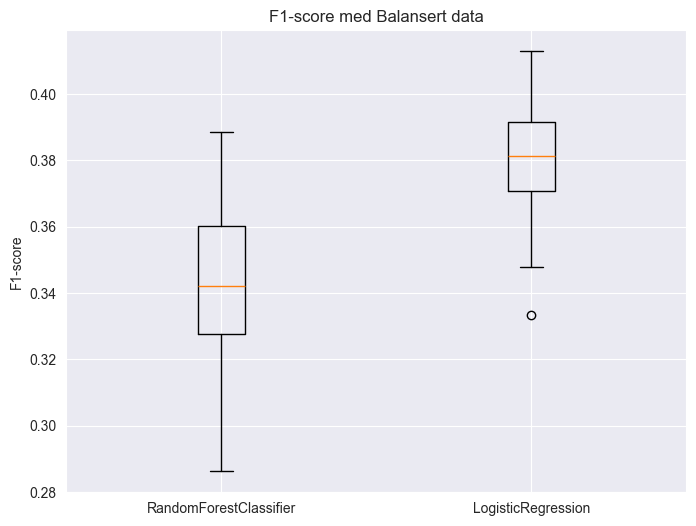


To-sidig t-test mellom model1 og model2:
t-statistikk = -12.330, p-verdi = 0.000

Gjennomsnitt for F1-score og accuracy:
RandomForestClassifier: F1 = 0.343, Accuracy = 0.822
Logistic Regression: F1 = 0.380, Accuracy = 0.647


In [7]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling
f1_scorer = make_scorer(f1_score, pos_label=1)

#Modeller
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=1000)

#repitert kfold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

#SMOTE
smote_Random = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', model1)
])

smote_logistic = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', model2)
])

#f1
f1_model1 = cross_val_score(smote_Random, X_small, y_small, cv=rkf, scoring=f1_scorer, n_jobs=-1)
f1_model2 = cross_val_score(smote_logistic, X_small, y_small, cv=rkf, scoring=f1_scorer, n_jobs=-1)

#accuracy
acc_model1 = cross_val_score(smote_Random, X_small, y_small, cv=rkf, scoring='accuracy', n_jobs=-1)
acc_model2 = cross_val_score(smote_logistic, X_small, y_small, cv=rkf, scoring='accuracy', n_jobs=-1)

#boxplot
plt.figure(figsize=(8,6))
plt.boxplot([f1_model1, f1_model2], tick_labels=['RandomForestClassifier','LogisticRegression'])
plt.ylabel('F1-score')
plt.title('F1-score med Balansert data')
plt.show()

#p_value er to stidig som stanader vi sjekker for forskjell i begge retninger
t_stat, p_value = ttest_rel(f1_model1, f1_model2)

print("\nTo-sidig t-test mellom model1 og model2:")
print(f"t-statistikk = {t_stat:.3f}, p-verdi = {p_value:.3f}")

#Printer Gjennomsnitt
print("\nGjennomsnitt for F1-score og accuracy:")
print(f"RandomForestClassifier: F1 = {f1_model1.mean():.3f}, Accuracy = {acc_model1.mean():.3f}")
print(f"Logistic Regression: F1 = {f1_model2.mean():.3f}, Accuracy = {acc_model2.mean():.3f}")

**Svar:**

*< Når vi inntar bruk av SMOTE så kan vi se at F1 scoren for RandomForestClassifier økte betydlig mens F1 scoren for LogisticRegression holdt seg stabil selv etter bruk av SMOTE og har forbedret modellens evne til å fange minoritetsklassen uten å endre hovedmønste for LogisticRegression og i følge vår To-sidig t-test så er det forsatt en signifikant forskjell mellom modellene og LogisticRegression gjør det forsatt bedre en RandomForestClassifier på et balansert datasett men vi kan se at RandomforestClassifier økte sinn F1 score veldig mye med et balansert datasett>*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [8]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene
#Trening og TestData
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

#Trener Modelen
model = LogisticRegression(random_state=42, max_iter=1000,class_weight='balanced')
model.fit(X_train_processed, y_train)

#Prediksjon på testsett
y_pred = model.predict(X_test_processed)

#Scorer
f1 = f1_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall_pos = recall_score(y_test, y_pred, pos_label=1)  # Sensitivitet
recall_neg = recall_score(y_test, y_pred, pos_label=0)  # Spesifisitet

#Printer resUltater
print("Ytelse på testsettet:")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Sensitivitet: {recall_pos:.3f}")
print(f"Spesifisitet: {recall_neg:.3f}")

Ytelse på testsettet:
F1-score: 0.401
Accuracy: 0.643
Precision: 0.253
Sensitivitet: 0.973
Spesifisitet: 0.596


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [9]:
#TODO: Gjør kjønnsbasert analyse på testdataene
#Testsettet
X_test_processed = preprocessor.transform(X_test)

#Prediksjon
y_pred = model.predict(X_test_processed)

#Legger till Kjønn i testsettet
test_df = X_test.copy()
test_df['Response'] = y_test.values
test_df['Prediction'] = y_pred

#Deler opp testsettet basert på kjønn
test_men = test_df[test_df['Gender'] == 'Male']
test_women = test_df[test_df['Gender'] == 'Female']

#evaluering for menn og kvinner
def evaluate_group(df, group_name):
    y_true = df['Response']
    y_pred = df['Prediction']

    #Scorer
    f1 = f1_score(y_true, y_pred, pos_label=1)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    sensitivity = recall_score(y_true, y_pred, pos_label=1)
    specificity = recall_score(y_true, y_pred, pos_label=0)

    #Printer Resultater
    print(f"\nEvaluering for {group_name}:")
    print(f"F1: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"presisjon: {precision:.3f}")
    print(f"Sensitivitet: {sensitivity:.3f}")
    print(f"Spesifisitet: {specificity:.3f}")

evaluate_group(test_men, "Menn")
evaluate_group(test_women, "Kvinner")


Evaluering for Menn:
F1: 0.416
Accuracy: 0.616
presisjon: 0.264
Sensitivitet: 0.980
Spesifisitet: 0.557

Evaluering for Kvinner:
F1: 0.379
Accuracy: 0.674
presisjon: 0.236
Sensitivitet: 0.963
Spesifisitet: 0.641


**Svar:**
< Vel vi kan see at Modellen hinter til at Menn har en bedre evaluering enn Kvinner men forskjellen er ikke stor, Dette kan være at testdataene vi har bruke ikke er balansert og kansje det er flere Menn en kvinner i testdataene med en positiv svar Vi kan ha Brukt SMOTE som tidligere for å balansere datasettet for å få et reelt svar når man tar i bruke like mange Kvinner og Menn>

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i besvarelsen

In [10]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
